### **Clone Fasttext Repo on Github**

In [1]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3826, done.
remote: Total 3826 (delta 0), reused 0 (delta 0), pack-reused 3826
Receiving objects: 100% (3826/3826), 8.20 MiB | 34.54 MiB/s, done.
Resolving deltas: 100% (2408/2408), done.


In [2]:
cd fastText

/content/fastText


In [3]:
!make

c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/vector.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/model.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/utils.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -

### **Google Drive API**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **Import Library**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Load Dataset**

In [8]:
from google.colab import files
files.upload()

Saving test.xlsx to test.xlsx
Saving train.xlsx to train.xlsx


{'test.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [0]:
train = pd.read_excel('train.xlsx', index_col=0)
test  = pd.read_excel('test.xlsx', index_col=0)

In [10]:
train.tail()

,text,label
1440,iluminasi remason konstipasi pas beol keras,-1
1709,sabar ya,1
1071,lieur putus sayang ama keluarga kampung ya ngg...,1
4761,awas bg cebong ayan,-1
4313,nonton kali uras emosi pas narasumber supir mo...,-1


**Checking Nan Values**

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 2958 to 4313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2900 non-null   object
 1   label   2929 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [12]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2900 non-null   object
 1   label   2900 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.4+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 2791 to 797
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    729 non-null    object
 1   label   733 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


In [14]:
test.dropna(inplace=True)
test.reset_index(drop=True, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    729 non-null    object
 1   label   729 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.5+ KB


### **Write into txt File**

In [0]:
file = open('train.txt', 'w+')

for i in train.index:
  line = '_label_'+str(train['label'][i])+' '+train['text'][i]
  file.write(line+'\n')

In [0]:
# file = open('test.txt', 'w+')

# for i in test.index:
#   line = test['text'][i]
#   file.write(line+'\n')

### **Model Training**

In [0]:
# !pip install fasttext

In [0]:
# !pip install gensim

In [0]:
from gensim.corpora import WikiCorpus

dataset = WikiCorpus('/content/drive/My Drive/idwiki-latest-pages-articles.xml.bz2', lemmatize=False, dictionary={})

In [0]:
# start_time = time.time()

# with open("wiki-id-formatted.txt", 'w', encoding="utf8") as output:
#   counter = 0
#     for text in dataset.get_texts():
#       output.write(' '.join(text)+"\n")
#       counter = counter + 1
#       if counter > 100000: # Hanya mengambil 100,000 artikel pertama
#         break

# print('-- %s seconds --' %(time.time() - start_time))

In [0]:
# wiki_model = fasttext.train_unsupervised('wiki-id-formatted.txt', model='skipgram')

# print("--- %s seconds ---" % (time.time() - start_time))

In [41]:
start_time = time.time()

!./fasttext skipgram -input /content/wiki-id-formatted.txt -output wiki_model

print("--- %s seconds ---" % (time.time() - start_time))

Read 8M words
Number of words:  64472
Number of labels: 0
Progress: 100.0% words/sec/thread:    5819 lr:  0.000000 avg.loss:  1.571205 ETA:   0h 0m 0s
--- 652.4923450946808 seconds ---


In [43]:
!./fasttext supervised -input ../fastText/train.txt -output model -label _label_ -dim 100 -lr 1.0 -lrUpdateRate 200 -epoch 50 -loss hs -ws 10 -pretrainedVectors wiki_model.vec

Read 0M words
Number of words:  6522
Number of labels: 3
Progress: 100.0% words/sec/thread:  379045 lr:  0.000000 avg.loss:  0.124610 ETA:   0h 0m 0s


### **Model Predict**

In [0]:
# !./fasttext ../fastText/model2.vec

# !./fasttext print-word-vectors model.bin < ../fastText/test.txt

!./fasttext nn model.bin

# y_pred_prob = !./fasttext predict-prob model.bin ../valid.txt

# y_pred = !./fasttext predict ../fastText/model2.bin ../test.txt

In [0]:
y_pred = !./fasttext predict model.bin ../fastText/test.txt

In [0]:
y_test = '_label_' + test['label'].astype(str)

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[188,  21,  18],
       [ 29, 232,  31],
       [ 17,  24, 169]])

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8079561042524005

In [0]:
y_pred_list = []

for i in range(len(y_pred)):
  y_pred_list.append(y_pred[i])


In [0]:
y_pred_series = pd.Series(y_pred_list)

In [38]:
len(y_pred_series)

729

**Concat Series**


In [0]:
data = pd.concat([test, y_pred_series], axis=1)

In [40]:
data.head(100)

,text,label,0
0,kali masyarakat nusantara dampak wabah sakit l...,-1,_label_-1
1,mas th bangsa indonesia hny pintu gerbang merd...,0,_label_0
2,nemu orang paruh baya alami ganggu mental tida...,1,_label_1
3,bosan kyk,-1,_label_-1
4,program stimulus tidak implementasi khawatir m...,-1,_label_-1
...,...,...,...
95,pasuk indonesia overthinking,0,_label_0
96,pake duhh harap poin emang dah dapet poin fifa...,-1,_label_0
97,kali ngirim lamar kerja hilihh,0,_label_0
98,tebak lokesyen,0,_label_0


In [0]:
from google.colab import files

data.to_excel('hasil_fasttext.xlsx') 
files.download('hasil_fasttext.xlsx')

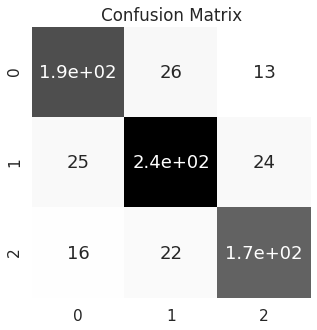

In [24]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(5,5))
sn.set(font_scale=1.4) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cbar=False, cmap='Greys').set_title('Confusion Matrix') # font size

plt.show()